In [ ]:
'''2. Titanic Classification :
Make a system which tells whether the person will be save from sinking. What factors weremost likely lead to success-
socio-economic status, age, gender and more.
'''

import all the required libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Titanic dataset
data = pd.read_csv('titanic_dataset.csv')

# Preprocess the data
# Select relevant features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch']
target = 'Survived'
data = data[features + [target]]



In [ ]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
#Cleaning the data
#Checking for null values
data.isnull().sum()

In [ ]:
# Handle missing values
data['Age'].fillna(data['Age'].median(), inplace=True)

#Now all null values has been removed
data.isnull().sum()

In [ ]:
#Data Visualisation
sns.pairplot(data=data,hue='Survived')

In [ ]:
plt.title("No of people survived and dead")
sns.countplot(x='Survived',data=data,width=0.4)
plt.legend(['dead'],loc='upper right')
plt.show()

In [ ]:
plt.title("Total no people from each class")
sns.countplot(x='Pclass',data=data,width=0.4)
plt.show()

In [ ]:
# this shows most of the people belong to 3rd class

In [ ]:
new_data = data.groupby(['Pclass'],as_index=False)['Survived'].sum()
new_data

In [ ]:

# no of people survived from each class
plt.title("No of people survived from each class")
sns.barplot(x=new_data['Pclass'],y=new_data['Survived'],data=new_data,palette='YlOrRd',width=0.4)

In [ ]:
plt.title("Sex of people")
sns.countplot(x='Sex',data=data,width=0.3)
plt.show()

In [ ]:
new_data = data.groupby(['Sex'])['Survived'].sum()
new_data


In [ ]:
p=[195,93]
mylables = new_data.index
plt.title("Sex of people who has Survived")
plt.pie(p,labels=mylables)
plt.legend()
plt.show()


In [ ]:


# Convert categorical variables to numerical labels
label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])


In [ ]:
# assigning x and y values
x = data.iloc[:,:-1]
y = data.iloc[:,-1]
print("data:\n", data.head())
x.head()


In [ ]:
y.head()

In [ ]:

# Split the data into training and testing sets
X = data.drop(columns=[target])
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.23, random_state=42)

# RandomForest Classifier

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer


# Preprocess the data to handle missing values
imputer = SimpleImputer(strategy='mean')  # Use mean strategy for imputation
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train the random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)


Accuracy: 0.8048780487804879
Precision: 0.7894736842105263
Recall: 0.7142857142857143
F1 Score: 0.7500000000000001
Confusion Matrix:
[[105  16]
 [ 24  60]]


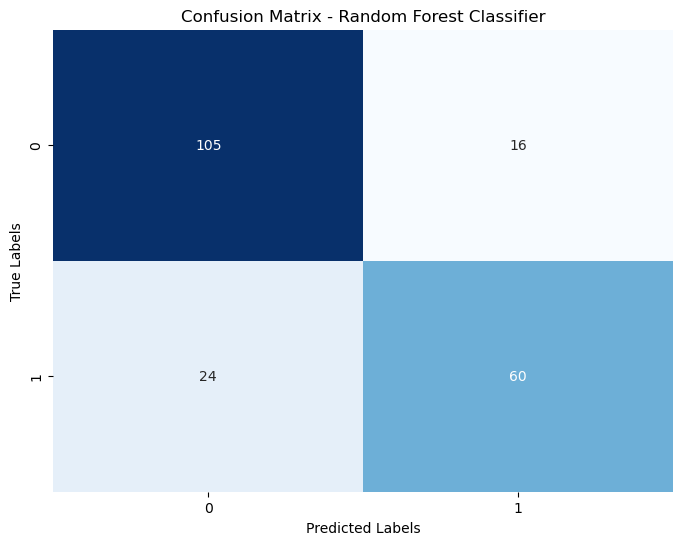

In [88]:
# Performance analysis of RFC
#Evaluation Metrics
accuracy = accuracy_score(y_test, rf_pred) 
precision = precision_score(y_test, rf_pred) 
recall = recall_score(y_test, rf_pred) 
f1 = f1_score(y_test, rf_pred) 
confusion_mat = confusion_matrix(y_test, rf_pred)

#Print evaluation metrics 
print(f"Accuracy: {accuracy}") 
print(f"Precision: {precision}") 
print(f"Recall: {recall}") 
print(f"F1 Score: {f1}") 
print(f"Confusion Matrix:\n{confusion_mat}")

#Confusion Matrix Heatmap 
plt.figure(figsize=(8, 6)) 
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False) 
plt.xlabel('Predicted Labels') 
plt.ylabel('True Labels') 
plt.title('Confusion Matrix - Random Forest Classifier') 
plt.show()

# Using sample input 


In [ ]:
input_sample=(1,0,67,0,3)
input_sample=np.asarray(input_sample)
input_sample=input_sample.reshape(1,-1)
input_sample

In [ ]:
prediction=rf_model.predict(input_sample)

In [ ]:
prediction

In [86]:
if prediction[0]==0:
    print("The chances for person SINKING are high")
else:
    print("The chances for person NOT SINKING are high")

The chances for person NOT SINKING are high


# Logistic Regression Classifier

Accuracy: 0.8097560975609757
Precision: 0.7777777777777778
Recall: 0.75
F1 Score: 0.7636363636363638
Confusion Matrix:
[[103  18]
 [ 21  63]]


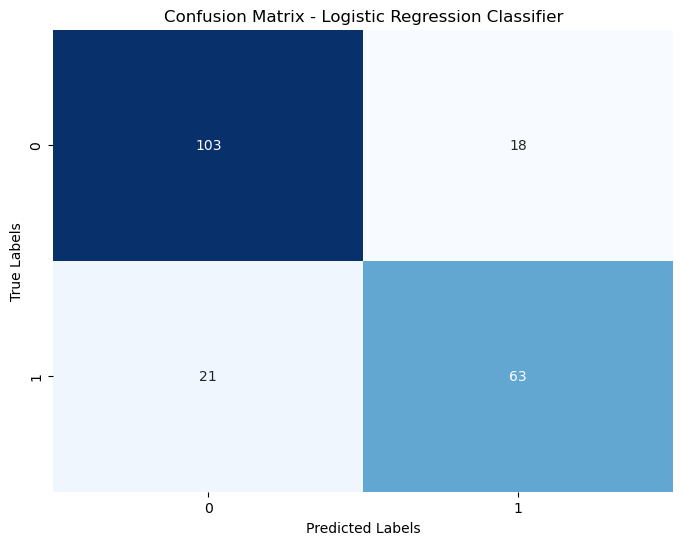

In [80]:
# Logistic Regression Classifier

from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)



# Evaluation Metrics
accuracy = accuracy_score(y_test, lr_pred)
precision = precision_score(y_test, lr_pred)
recall = recall_score(y_test, lr_pred)
f1 = f1_score(y_test, lr_pred)
confusion_mat = confusion_matrix(y_test, lr_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Logistic Regression Classifier')
plt.show()


# Support Vector Machine Classifier

Accuracy: 0.6146341463414634
Precision: 0.8571428571428571
Recall: 0.07142857142857142
F1 Score: 0.13186813186813187
Confusion Matrix:
[[120   1]
 [ 78   6]]


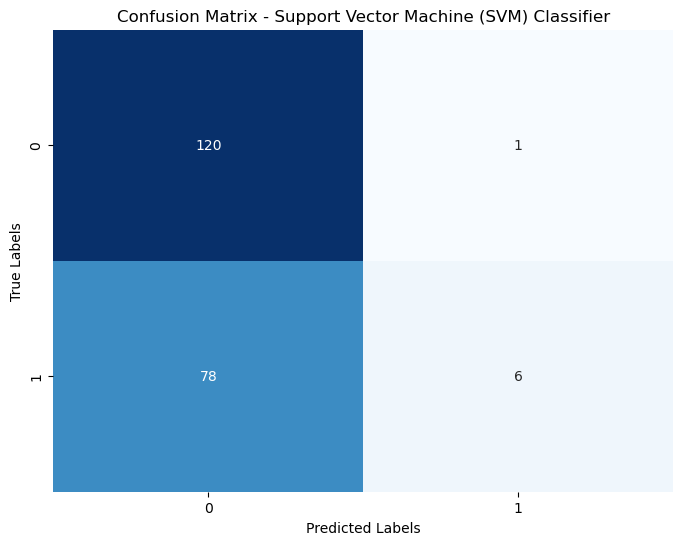

In [89]:
from sklearn.svm import SVC


# Support Vector Machine Classifier
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, svm_pred)
precision = precision_score(y_test, svm_pred, zero_division=0)
recall = recall_score(y_test, svm_pred)
f1 = f1_score(y_test, svm_pred)
confusion_mat = confusion_matrix(y_test, svm_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Support Vector Machine (SVM) Classifier')
plt.show()


#  K Nearest Neighbors Classifier

Accuracy: 0.7853658536585366
Precision: 0.7702702702702703
Recall: 0.6785714285714286
F1 Score: 0.721518987341772
Confusion Matrix:
[[104  17]
 [ 27  57]]


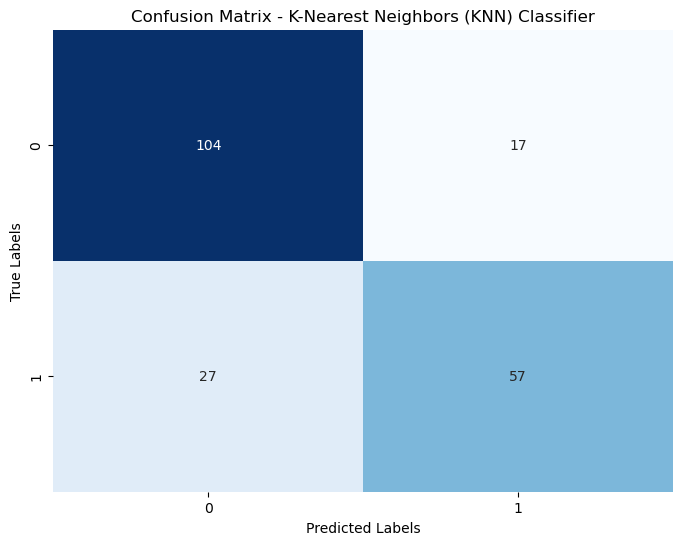

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# K-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, knn_pred)
precision = precision_score(y_test, knn_pred)
recall = recall_score(y_test, knn_pred)
f1 = f1_score(y_test, knn_pred)
confusion_mat = confusion_matrix(y_test, knn_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - K-Nearest Neighbors (KNN) Classifier')
plt.show()


# Decision Tree Classifier

Accuracy: 0.7560975609756098
Precision: 0.7125
Recall: 0.6785714285714286
F1 Score: 0.6951219512195121
Confusion Matrix:
[[98 23]
 [27 57]]


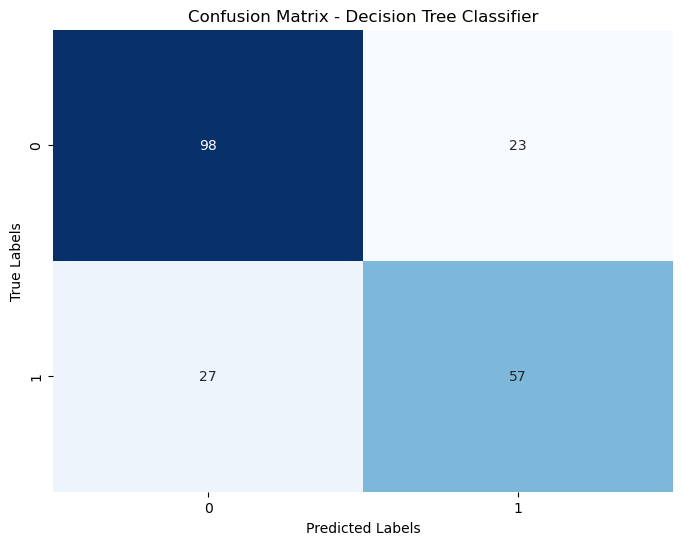

In [83]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, dt_pred)
precision = precision_score(y_test, dt_pred)
recall = recall_score(y_test, dt_pred)
f1 = f1_score(y_test, dt_pred)
confusion_mat = confusion_matrix(y_test, dt_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree Classifier')
plt.show()


# AdaBoost Classifier

Accuracy: 0.8
Precision: 0.7721518987341772
Recall: 0.7261904761904762
F1 Score: 0.7484662576687117
Confusion Matrix:
[[103  18]
 [ 23  61]]


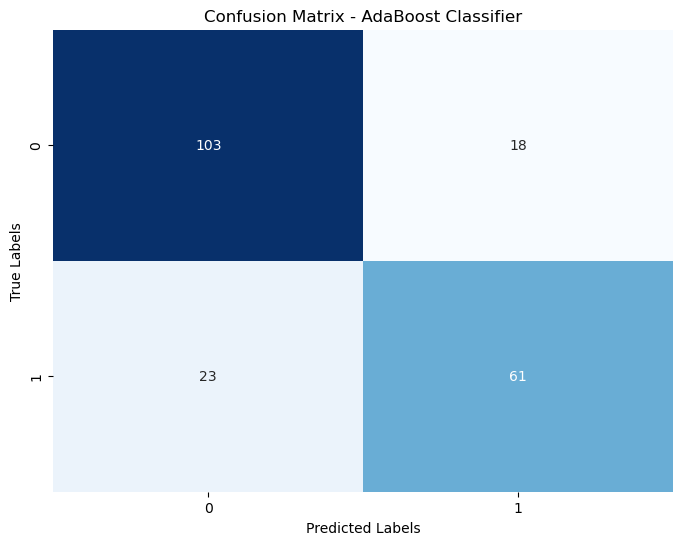

In [85]:
from sklearn.ensemble import AdaBoostClassifier
# AdaBoost Classifier
ada_model = AdaBoostClassifier(random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, ada_pred)
precision = precision_score(y_test, ada_pred)
recall = recall_score(y_test, ada_pred)
f1 = f1_score(y_test, ada_pred)
confusion_mat = confusion_matrix(y_test, ada_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.show()

# Gradient Boosting Classifier

Accuracy: 0.8292682926829268
Precision: 0.8450704225352113
Recall: 0.7142857142857143
F1 Score: 0.7741935483870968
Confusion Matrix:
[[110  11]
 [ 24  60]]


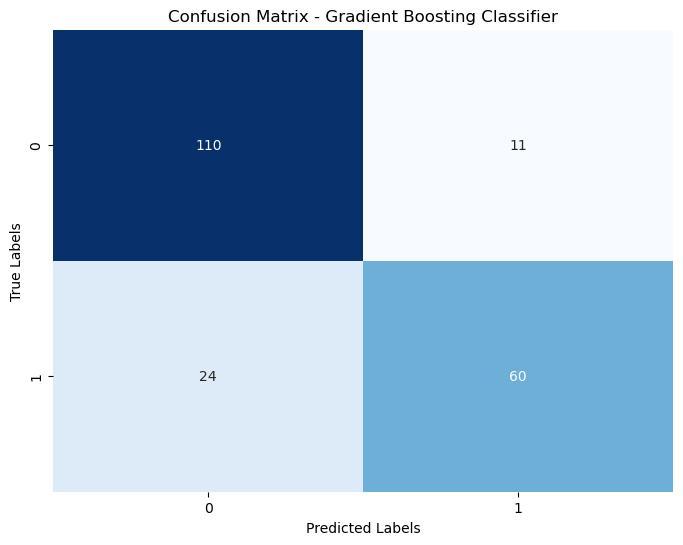

In [84]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

# Evaluation Metrics
accuracy = accuracy_score(y_test, gb_pred)
precision = precision_score(y_test, gb_pred)
recall = recall_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
confusion_mat = confusion_matrix(y_test, gb_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{confusion_mat}")

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.show()


### Conclusion: Out of the algorithms (RFC, Logistic Regression, SVC, KNN, GradientBoosting and AdaBoost Algorithm) , Gradient Boosting algorithm performs better for the given task i.e, Titanic classification.